# Group Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# prevent warnings from showing
import warnings
warnings.filterwarnings('ignore')

### Get Pima data

In [10]:
df = pd.read_csv("pima_diabetes.csv")
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [11]:
# the target must be categorical,otherwise it will also be visualized on the pairplot - True/False are numerical
df["diabetes"] = df["diabetes"].map({True: "Yes", False: "No"})

In [4]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000


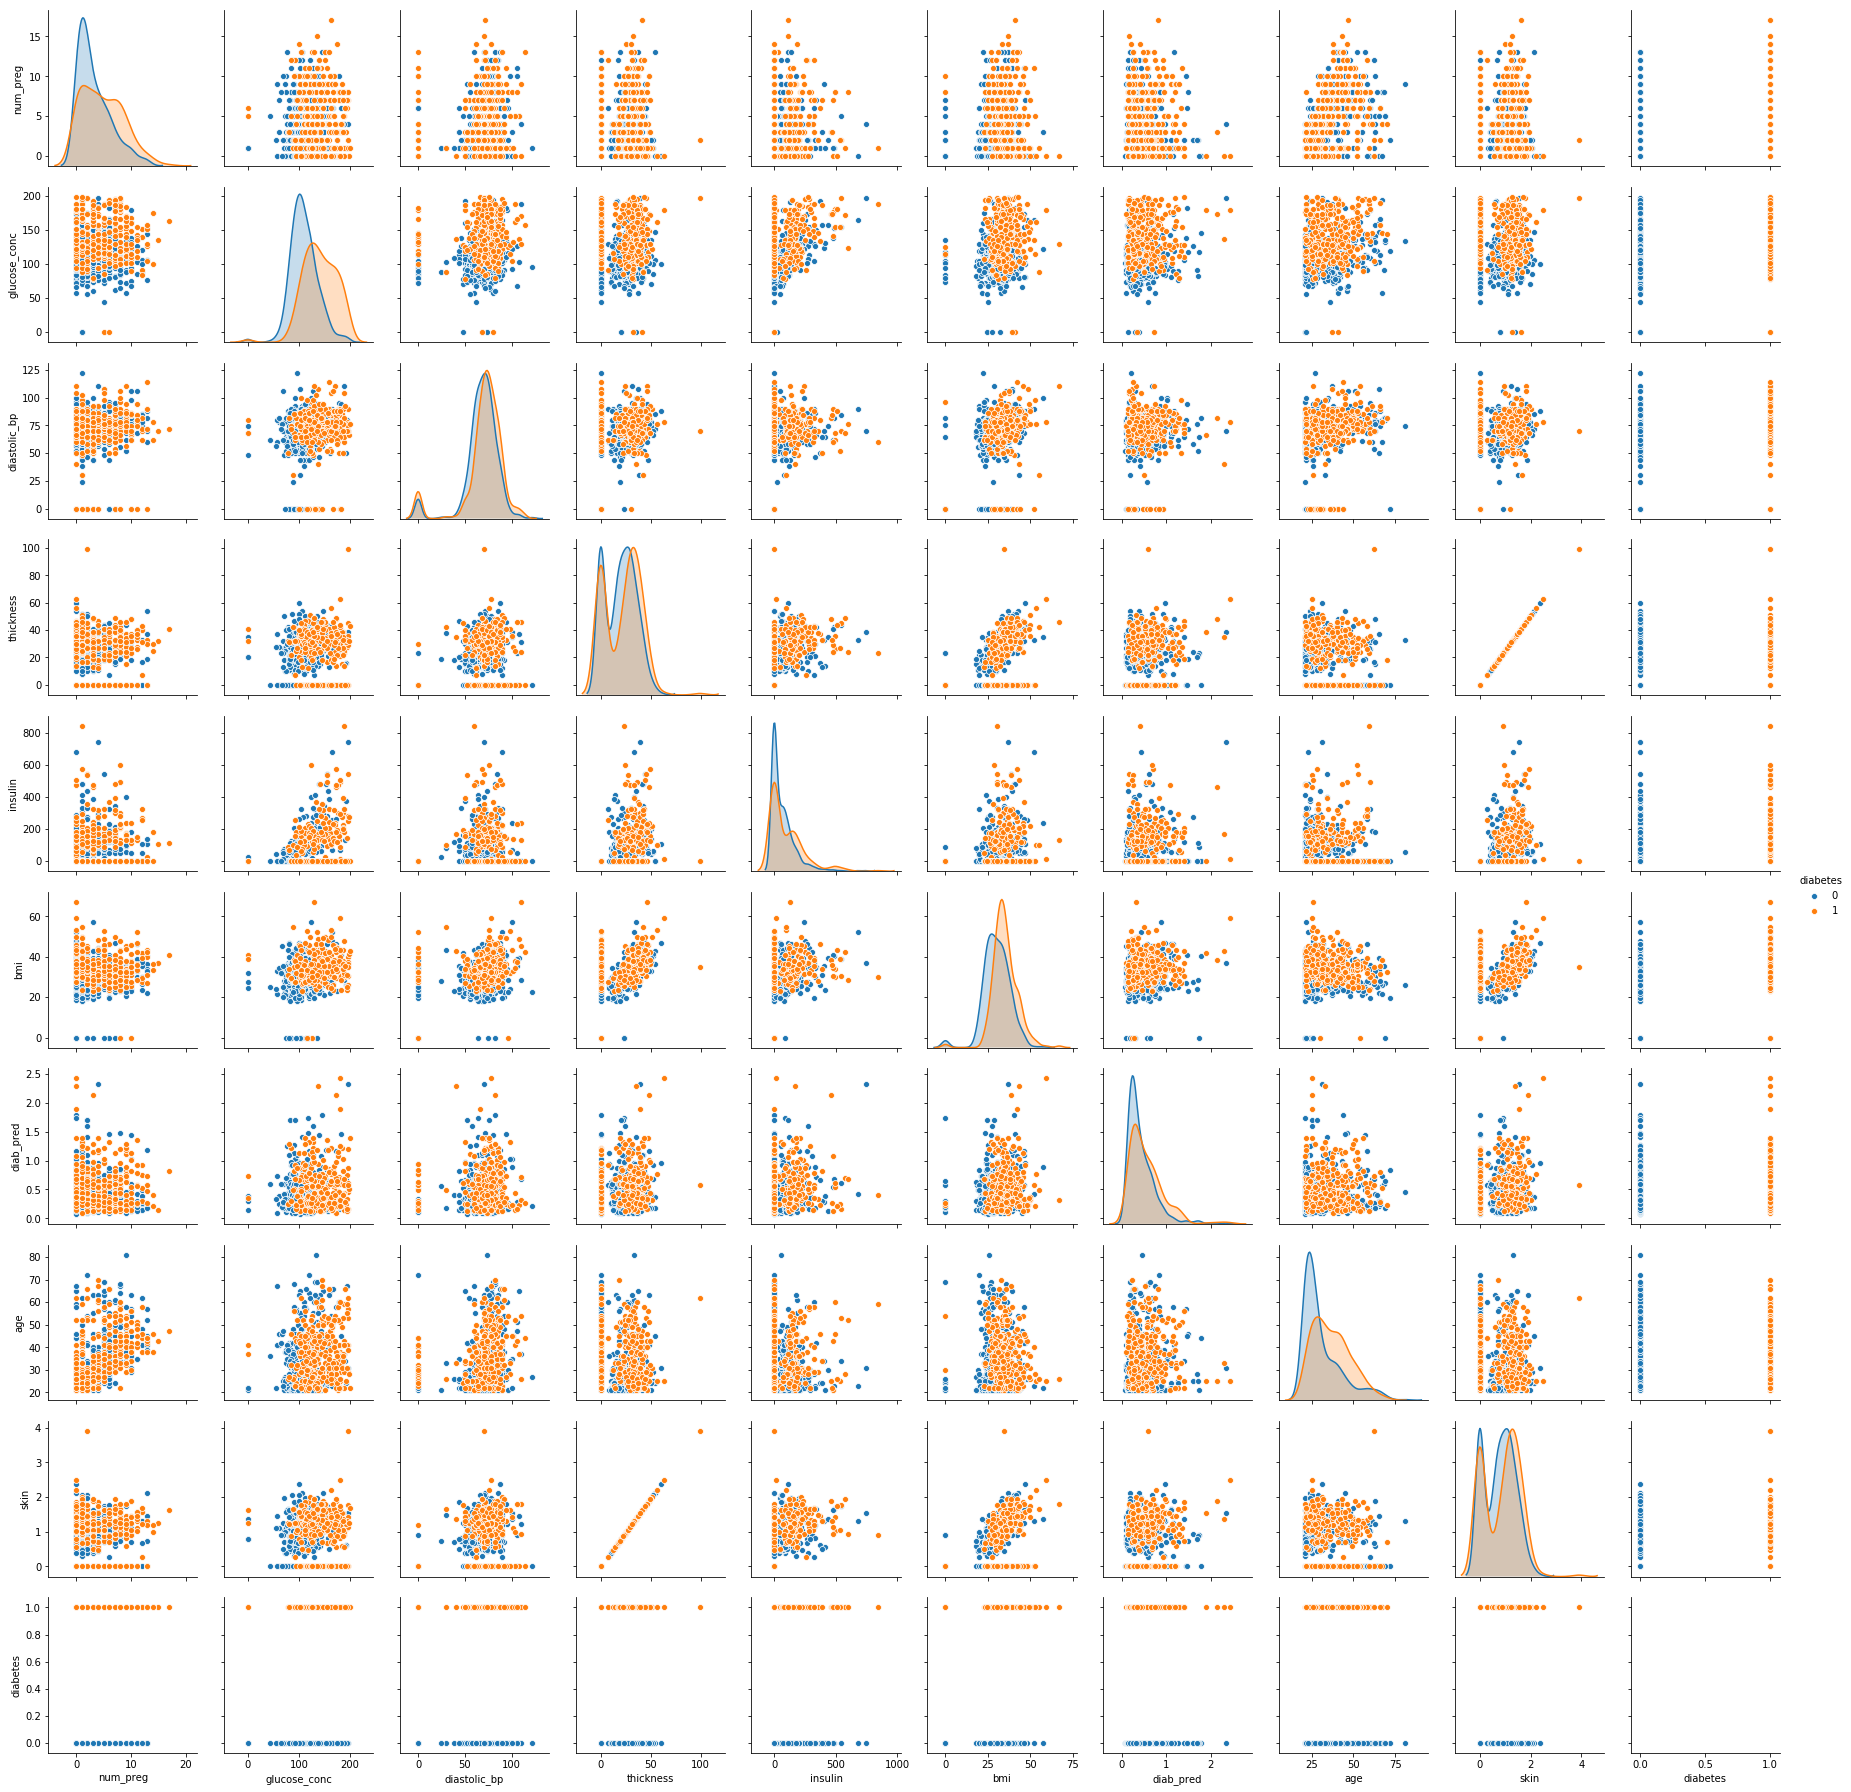

In [12]:
import seaborn as sns
pair_plot = sns.pairplot(df, hue='diabetes')

In [6]:
# drop returns a copy
df = df.drop(['skin'], axis=1)

In [7]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Impute missing values (optional)

In [13]:
# note the mean of "insulin"
df["insulin"].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: insulin, dtype: float64

In [14]:
# select the columns where zeros don't make sense (are missing values) and locate the zeros as a mask
mask = df[['glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred']] == 0
mask.head()

,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred
0,False,False,False,True,False,False
1,False,False,False,True,False,False
2,False,False,True,True,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [15]:
#### NOTE:  nan values will give you errors in scikit-learn, so don't replace missing values (zeros) with nan 
##   unless you plan on imputing (replaceing the nan values with some other reasonable value) prior to using scikit-learn.


# replace the zeros with np.nan (Not a Number)
df[mask] = np.nan
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1.3790,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,1.1426,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,0.0000,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790,1


In [16]:
# again, note the mean of "insulin" now that the zeros are replaced with np.nan
df["insulin"].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: insulin, dtype: float64

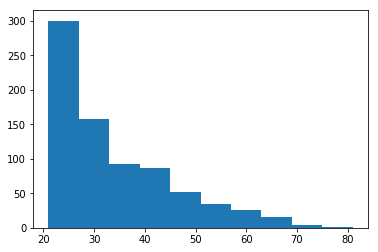

In [17]:
# plot age and observe the range of ages to aid in knowing what age range to use for imputation
fig, ax = plt.subplots()
ax.hist(df["age"])
plt.show()

In [18]:
df['age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

In [19]:
df.loc[df["age"] > 40, "insulin"].mean()

201.24285714285713

In [20]:
# example imputation: replacing all missing insulin values for anyone over 40 
                    # with the mean insulin value of all individuals over 40
from sklearn.impute import SimpleImputer

fill_nan = SimpleImputer(missing_values=np.nan, strategy="mean")

df.loc[df["age"] > 40, "insulin"] = fill_nan.fit_transform(df.loc[df["age"] > 40, "insulin"].values.reshape(-1, 1))

df.head()


###########  You can repeat the above procedures for each feature that has missing values and needs imputation

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72.0,35.0,201.242857,33.6,0.627,50,1.3790,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,1.1426,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,0.0000,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0.9062,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1.3790,1


### Set X and y

In [21]:
# get X
X = df.iloc[:, :-1].values
X[:5]


array([[6.00000000e+00, 1.48000000e+02, 7.20000000e+01, 3.50000000e+01,
        2.01242857e+02, 3.36000000e+01, 6.27000000e-01, 5.00000000e+01,
        1.37900000e+00],
       [1.00000000e+00, 8.50000000e+01, 6.60000000e+01, 2.90000000e+01,
                   nan, 2.66000000e+01, 3.51000000e-01, 3.10000000e+01,
        1.14260000e+00],
       [8.00000000e+00, 1.83000000e+02, 6.40000000e+01,            nan,
                   nan, 2.33000000e+01, 6.72000000e-01, 3.20000000e+01,
        0.00000000e+00],
       [1.00000000e+00, 8.90000000e+01, 6.60000000e+01, 2.30000000e+01,
        9.40000000e+01, 2.81000000e+01, 1.67000000e-01, 2.10000000e+01,
        9.06200000e-01],
       [0.00000000e+00, 1.37000000e+02, 4.00000000e+01, 3.50000000e+01,
        1.68000000e+02, 4.31000000e+01, 2.28800000e+00, 3.30000000e+01,
        1.37900000e+00]])

In [22]:
# Transform categorical values to binary
df["diabetes"] = df["diabetes"].map({True:1, False:0})

In [23]:
# get y
y = df["diabetes"].values
y[:5]

array([1, 0, 1, 0, 1], dtype=int64)

### Split data into train and test sets

In [25]:
# split dataset into test/train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [26]:
X_train.shape, X_test.shape

((537, 9), (231, 9))

In [27]:
X_train[:5]

array([[ 15.    , 136.    ,  70.    ,  32.    , 110.    ,  37.1   ,
          0.153 ,  43.    ,   1.2608],
       [  0.    ,  97.    ,  64.    ,  36.    , 100.    ,  36.8   ,
          0.6   ,  25.    ,   1.4184],
       [  1.    , 116.    ,  70.    ,  28.    ,      nan,  27.4   ,
          0.204 ,  21.    ,   1.1032],
       [  2.    , 106.    ,  64.    ,  35.    , 119.    ,  30.5   ,
          1.4   ,  34.    ,   1.379 ],
       [  0.    , 123.    ,  88.    ,  37.    ,      nan,  35.2   ,
          0.197 ,  29.    ,   1.4578]])

### Standardize the data

In [28]:
from sklearn.preprocessing import StandardScaler

# scale/standardize features
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 
X_train_std[:5]

array([[ 3.3536084 ,  0.47803401, -0.18855488,  0.31563956, -0.59503263,
         0.70835416, -0.94690147,  0.81020454,  0.78140634],
       [-1.12101735, -0.82402409, -0.64846678,  0.69502897, -0.6949284 ,
         0.6649972 ,  0.39612987, -0.69526203,  1.03229735],
       [-0.82270897, -0.1896881 , -0.18855488, -0.06374986,         nan,
        -0.6935208 , -0.7936697 , -1.02981015,  0.53051534],
       [-0.52440058, -0.52354915, -0.64846678,  0.60018162, -0.50512643,
        -0.2454989 ,  2.79976539,  0.05747126,  0.9695746 ],
       [-1.12101735,  0.04401464,  1.19118083,  0.78987633,         nan,
         0.43376009, -0.81470151, -0.3607139 ,  1.0950201 ]])

In [ ]:

########## Now you're ready to move on to training your models  ##########
